In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame = pd.read_csv("./train.csv")

In [3]:
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**We are going to use the DecisionTree model; however, this model cannot work with strings, so we need to transform strings into float numbers using a "std" function down in code.**

In [4]:
data_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data_frame.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
from matplotlib import pyplot as plt

**Because we have to much Cabin NaN values we will drop that column, this is not case with Age we are going to fill NaN values with median**

In [6]:
from scipy.stats import norm

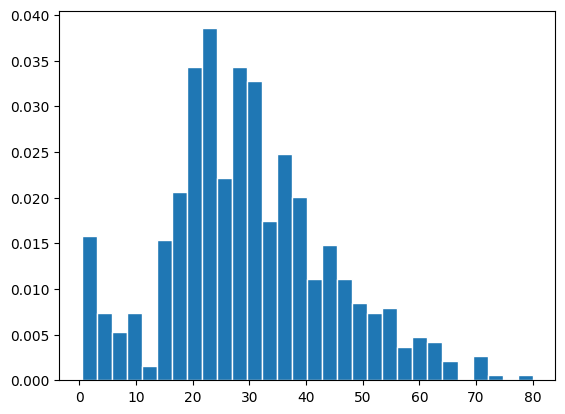

In [9]:
Y = data_frame['Age'].values

# Izračunajte histogram za niz
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=30, density=True) # Postavite density=True za normalizaciju histograma

# Izračunajte parametre normalne raspodele na osnovu podataka
mu, sigma = np.mean(Y), np.std(Y)

# Generišite tačke za crtanje funkcije normalne raspodele
x = np.linspace(min(bins), max(bins), 100)
pdf = norm.pdf(x, mu, sigma)

# Nacrtajte histogram i funkciju normalne raspodele


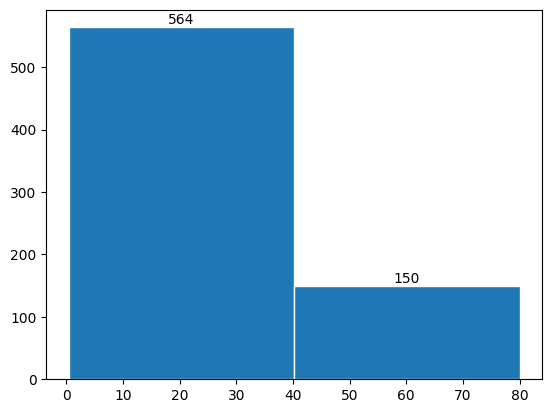

In [11]:
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=2)

bin_centers = np.diff(bins)*0.5 + bins[:-1] # računanje centra korpice

for fr, x in zip(freq, bin_centers):
    height = int(fr)
    plt.annotate("{}".format(height),
               xy = (x, height),             # poziciranje broja iznad korpice
               xytext = (0,0.2),             # odvajanje teksta od korpice
               textcoords = "offset points", 
               ha = 'center', va = 'bottom'
               )

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
def std(data_frame):
    encoder = OrdinalEncoder()
    encoder.fit(data_frame[['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket']])
    encoded_data = encoder.transform(data_frame[['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket']])
    
    data = pd.DataFrame(encoded_data)
    data_frame['Name'] = data.iloc[:, 0]
    data_frame['Sex'] = data.iloc[:, 1]
    data_frame['Cabin'] = data.iloc[:, 2]
    data_frame['Embarked'] = data.iloc[:, 3]
    data_frame['Ticket'] = data.iloc[:, 4]
    
    age_mean = data_frame['Age'].mean()
    data_frame['Age'] = data_frame['Age'].fillna(age_mean)
    embark_mean = data_frame['Embarked'].mean()
    data_frame['Embarked'] = data_frame['Embarked'].fillna(embark_mean)

    
    data_frame = data_frame.drop(['Cabin', 'PassengerId'], axis=1) #EMB TODO
    #data_frame.dropna(inplace=True)
    
   # from sklearn.preprocessing import StandardScaler
   # scaler = StandardScaler()
   # data_frame['Name'] = scaler.fit_transform(data_frame[['Name']])
   # data_frame['Age'] = scaler.fit_transform(data_frame[['Age']])
   # data_frame['Ticket'] = scaler.fit_transform(data_frame[['Ticket']])
   # data_frame['Fare'] = scaler.fit_transform(data_frame[['Fare']])
    return data_frame

In [ ]:
data_frame = std(data_frame)
data_frame

In [ ]:
Y = data_frame['Age'].values

# Izračunajte histogram za niz
freq, bins, _ = plt.hist(Y, edgecolor='white', bins=30, density=True) # Postavite density=True za normalizaciju histograma

# Izračunajte parametre normalne raspodele na osnovu podataka
mu, sigma = np.mean(Y), np.std(Y)

# Generišite tačke za crtanje funkcije normalne raspodele
x = np.linspace(min(bins), max(bins), 100)
pdf = norm.pdf(x, mu, sigma)

# Nacrtajte histogram i funkciju normalne raspodele
plt.plot(x, pdf, label='Normalna raspodela', color='red')

***We want to train and determine which hyperparameters are best for our model without peeking into the test set because we aim to prevent overfitting. Therefore, we will perform a train/test split to identify the optimal hyperparameters***

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = data_frame.drop('Survived', axis=1)

In [97]:
Y = data_frame['Survived']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size=0.75)

In [99]:
X_train.shape

(668, 9)

In [100]:
Y_train.shape

(668,)

In [101]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
241,3,567.0,0.0,29.699118,1,0,444.0,15.5000,1.0
652,3,421.0,1.0,21.000000,0,0,512.0,8.4333,2.0
386,3,298.0,1.0,1.000000,5,2,566.0,46.9000,2.0
636,3,469.0,1.0,32.000000,0,0,664.0,7.9250,2.0
596,2,470.0,0.0,29.699118,0,0,155.0,33.0000,2.0


In [102]:
X_train.describe()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.293413,440.303892,0.652695,29.888980,0.516467,0.365269,336.700599,32.433246,1.534431
std,0.838084,260.254250,0.476471,13.128510,1.053885,0.796238,200.646280,51.036057,0.793724
min,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,211.750000,0.000000,22.000000,0.000000,0.000000,157.750000,7.925000,1.000000
50%,3.000000,437.000000,1.000000,29.699118,0.000000,0.000000,333.000000,15.022900,2.000000
75%,3.000000,670.250000,1.000000,35.000000,1.000000,0.000000,515.500000,31.068750,2.000000
max,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


In [103]:
X_train.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [104]:
from sklearn.metrics import accuracy_score, f1_score

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
def decisionModel(X_train, Y_train, n):
    dmodel = DecisionTreeClassifier(max_depth=n)
    dmodel.fit(X_train, Y_train)
   # predict1 = dmodel.predict(X_test)
   # print(accuracy_score(Y_test, predict1), f1_score(Y_test, predict1))
    return dmodel

In [107]:
#dmodel = decisionModel(X, Y)

**After this for loop we will have the best depth for our tree**

In [108]:
n = 0
best_ac = 0
for i in range(1, 15):
    dmodel = decisionModel(X_train, Y_train, i)
    predict1 = dmodel.predict(X_test)
    if accuracy_score(Y_test, predict1) > best_ac:
        best_ac = accuracy_score(Y_test, predict1)
        n = i     
    print(accuracy_score(Y_test, predict1))

0.8116591928251121
0.7982062780269058
0.8071748878923767
0.820627802690583
0.8026905829596412
0.7847533632286996
0.7937219730941704
0.7937219730941704
0.7802690582959642
0.7847533632286996
0.7713004484304933
0.7982062780269058
0.7623318385650224
0.7847533632286996


In [109]:
#from sklearn.linear_model import LinearRegression

In [110]:
#lmodel = LinearRegression()
#lmodel.fit(X_train, Y_train)
#predict = lmodel.predict(X_test)
#pmin = predict.min()
#pmax = predict.max()
#predict = (predict-pmin)/(pmax-pmin)
#predict = np.where(predict < 0.5 , 0 , 1)
#print(accuracy_score(Y_test, predict), f1_score(Y_test, predict))

**Now we will train our model on whole data with best parameters**

In [111]:
finalModel = decisionModel(X, Y, n)

In [112]:
test_df = pd.read_csv("./test.csv")
#print(test_df.head())
print(test_df.shape)
passId = test_df['PassengerId']
test_df = std(test_df)


(418, 11)


In [113]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,206.0,1.0,34.50000,0,0,152.0,7.8292,1.0
1,3,403.0,0.0,47.00000,1,0,221.0,7.0000,2.0
2,2,269.0,1.0,62.00000,0,0,73.0,9.6875,1.0
3,3,408.0,1.0,27.00000,0,0,147.0,8.6625,2.0
4,3,178.0,0.0,22.00000,1,1,138.0,12.2875,2.0
...,...,...,...,...,...,...,...,...,...
413,3,353.0,1.0,30.27259,0,0,267.0,8.0500,2.0
414,1,283.0,0.0,39.00000,0,0,324.0,108.9000,0.0
415,3,332.0,1.0,38.50000,0,0,346.0,7.2500,2.0
416,3,384.0,1.0,30.27259,0,0,220.0,8.0500,2.0


In [114]:
pr = finalModel.predict(test_df)

Text(0.5, 1.0, 'Feature importance')

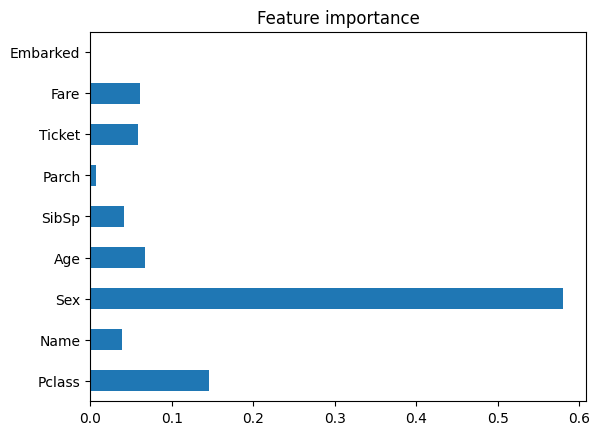

In [116]:
pd.Series(finalModel.feature_importances_, index=X.columns).plot.barh()
plt.title("Feature importance")

In [117]:
res_frame = pd.DataFrame(pr, columns= ['Survived'])
res_frame['PassengerId'] = passId
res_frame

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [118]:
res = pd.read_csv("./gender_submission.csv")

In [119]:
res

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [122]:
accuracy_score(res.iloc[:,1], res_frame.iloc[:,0])

0.8397129186602871

***We got the 90% accuracy!***

In [123]:
res_frame.to_csv('res.csv', index=False)